# Importing the Necessary Libraries for EDA

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


# Data Exploration and Processing 

In [317]:
#Loding the data file 

data_path ='../data/Life Expectancy.csv'
df = pd.read_csv(data_path)

In [318]:
#inspect the first few rows of the dataframe
#To check the data types 
#checking the number of rows and colums 


print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (2497, 22)

Column Names and Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2497 non-null   object 
 1   Year                             2497 non-null   int64  
 2   Status                           2497 non-null   object 
 3   Life expectancy                  2488 non-null   float64
 4   Adult Mortality                  2488 non-null   float64
 5   infant deaths                    2497 non-null   int64  
 6   Alcohol                          2333 non-null   float64
 7   percentage expenditure           2497 non-null   float64
 8   Hepatitis B                      2016 non-null   float64
 9   Measles                          2497 non-null   int64  
 10   BMI                             2466 non-null   float64
 11  under-five deaths              

In [319]:
# Check categorical variables
print("\n=== Categorical Variables ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 200:
        print(df[col].value_counts())


=== Categorical Variables ===

Country: 192 unique values
Country
Hungary                  16
Vanuatu                  16
Armenia                  16
Sao Tome and Principe    16
Zimbabwe                 16
                         ..
San Marino                1
Monaco                    1
Cook Islands              1
Tuvalu                    1
Dominica                  1
Name: count, Length: 192, dtype: int64

Status: 2 unique values
Status
Developing    2060
Developed      437
Name: count, dtype: int64


# Understanding of the dataset

- Rows: 2,497

- Columns: 22

- **Target: Life expectancy**

- Features: health, demographic, economic indicators.

Categorical: Country, Status (Developed/Developing).

- Numeric: everything else


In [320]:
#to check the missing data points 
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      9
Adult Mortality                      9
infant deaths                        0
Alcohol                            164
percentage expenditure               0
Hepatitis B                        481
Measles                              0
 BMI                                31
under-five deaths                    0
Polio                               16
Total expenditure                  191
Diphtheria                          16
 HIV/AIDS                            0
GDP                                365
Population                         540
 thinness  1-19 years               31
 thinness 5-9 years                 31
Income composition of resources    141
Schooling                          137
dtype: int64


In [321]:
#for a cleaner view 
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False))


                                 Missing_Count  Percentage
Population                                 540       21.63
Hepatitis B                                481       19.26
GDP                                        365       14.62
Total expenditure                          191        7.65
Alcohol                                    164        6.57
Income composition of resources            141        5.65
Schooling                                  137        5.49
 BMI                                        31        1.24
 thinness  1-19 years                       31        1.24
 thinness 5-9 years                         31        1.24
Polio                                       16        0.64
Diphtheria                                  16        0.64
Life expectancy                              9        0.36
Adult Mortality                              9        0.36


### Thus Far: 

Population → 540 missing

Hepatitis B → 481 missing

GDP → 365 missing

Total expenditure → 191 missing

Alcohol → 164 missing

Schooling, Income composition of resources → ~140 missing

Target (Life expectancy) → 9 missing

Insights: 

- Drop rows where Life expectancy is missing (target must exist).

- For numeric features: fill missing with mean/median.

For categorical (Status): no missing values, so we’re good!

## Statistical summary

In [322]:
# Drop rows with missing target
df = df.dropna(subset=['Life expectancy '])

In [323]:
print("\n=== Statistical Summary ===")
df.describe().style.background_gradient(cmap='Reds')



=== Statistical Summary ===


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2488.000000,2488.000000,2488.000000,2488.000000,2325.000000,2488.000000,2007.000000,2488.000000,2459.000000,2488.000000,2472.000000,2297.000000,2472.000000,2488.000000,2127.000000,1955.000000,2459.000000,2459.000000,2353.000000,2353.000000
mean,2007.459405,69.143770,164.647508,29.092042,4.589054,733.663847,81.041854,2439.924437,38.006954,40.404341,82.423544,5.927645,82.243528,1.704984,7361.175512,13145326.963826,4.829484,4.874176,0.624910,11.967488
std,4.612700,9.517112,124.080010,107.805119,4.054694,1990.285958,25.043795,11761.023525,20.009367,147.498358,23.688997,2.475504,23.900487,4.906338,14157.797743,65106657.096453,4.376640,4.485651,0.213211,3.366286
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,3.685949,34.000000,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.200000,74.000000,0.000000,0.860000,5.381239,77.000000,0.000000,19.100000,0.000000,78.000000,4.250000,78.000000,0.100000,457.663303,182886.000000,1.600000,1.600000,0.489000,10.100000
50%,2007.000000,72.000000,144.000000,3.000000,3.700000,64.731034,92.000000,17.000000,42.900000,4.000000,93.000000,5.750000,93.000000,0.100000,1682.957924,1354775.000000,3.300000,3.300000,0.675000,12.300000
75%,2011.000000,75.525000,227.000000,22.000000,7.700000,438.989617,96.000000,387.500000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,5869.338446,7478376.500000,7.200000,7.200000,0.780000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1293859294.000000,27.700000,28.600000,0.948000,20.700000


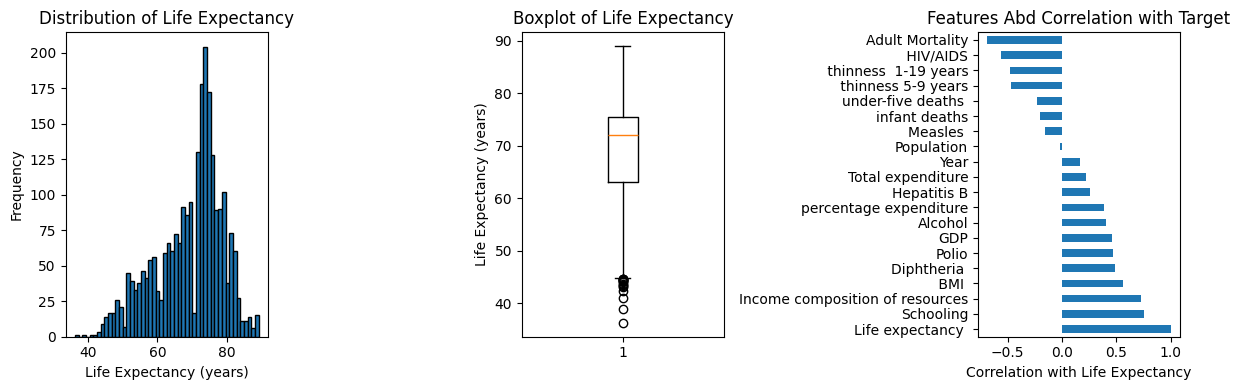

In [324]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['Life expectancy '], bins=50, edgecolor='black')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')



plt.subplot(1, 3, 2)
plt.boxplot(df['Life expectancy '])
plt.ylabel('Life Expectancy (years)')
plt.title('Boxplot of Life Expectancy')



plt.subplot(1, 3, 3)
# Calculate correlations only for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['Life expectancy '].sort_values(ascending=False)
correlations.plot(kind='barh')
plt.xlabel('Correlation with Life Expectancy')
plt.title('Features Abd Correlation with Target')
plt.tight_layout()
plt.show()

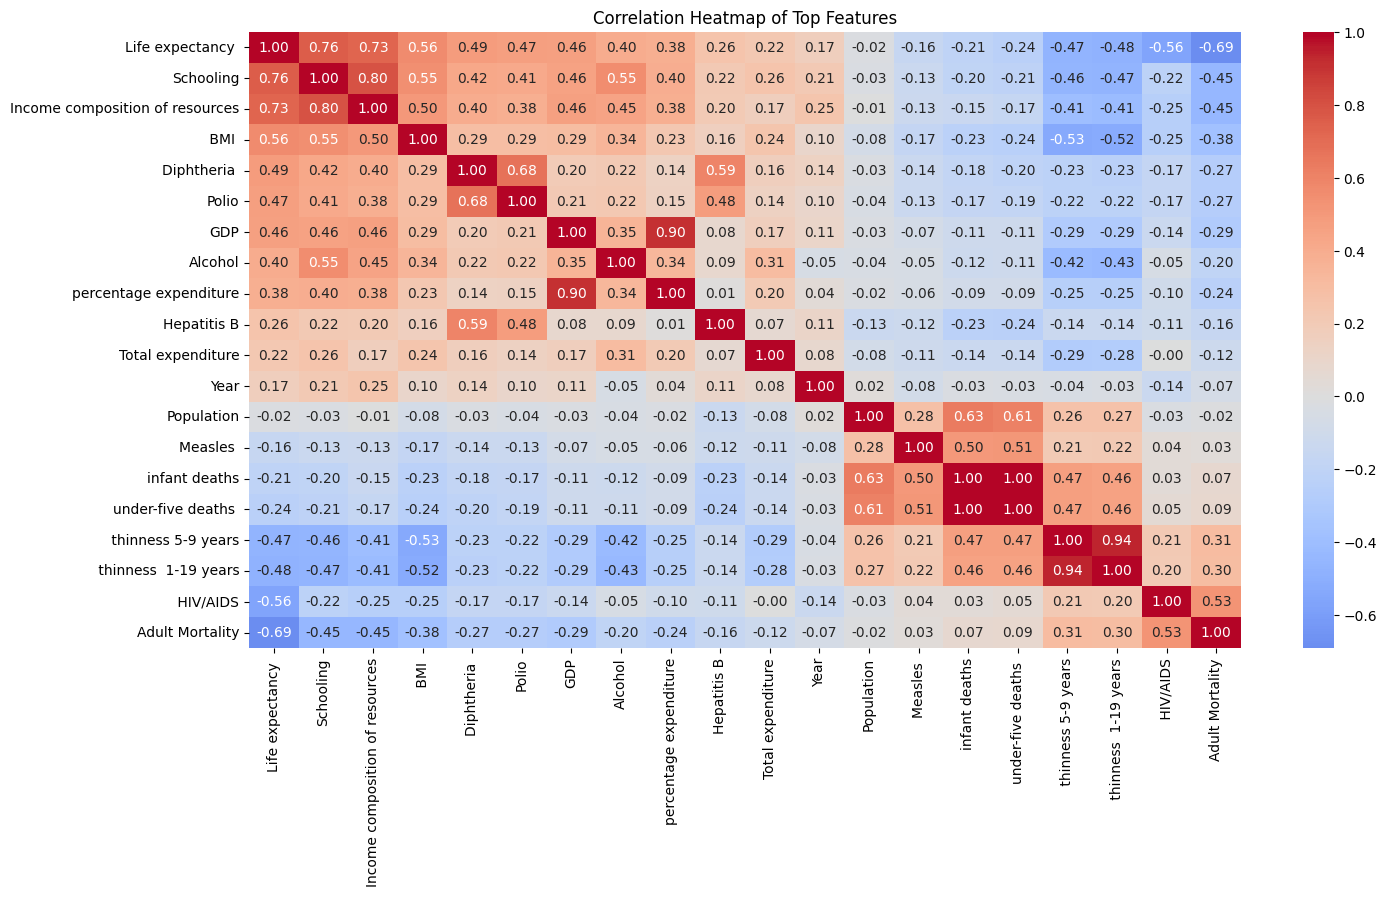

In [325]:
plt.figure(figsize=(16, 8))
top_features = correlations.index.tolist()
sns.heatmap(df[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top Features')
plt.show()

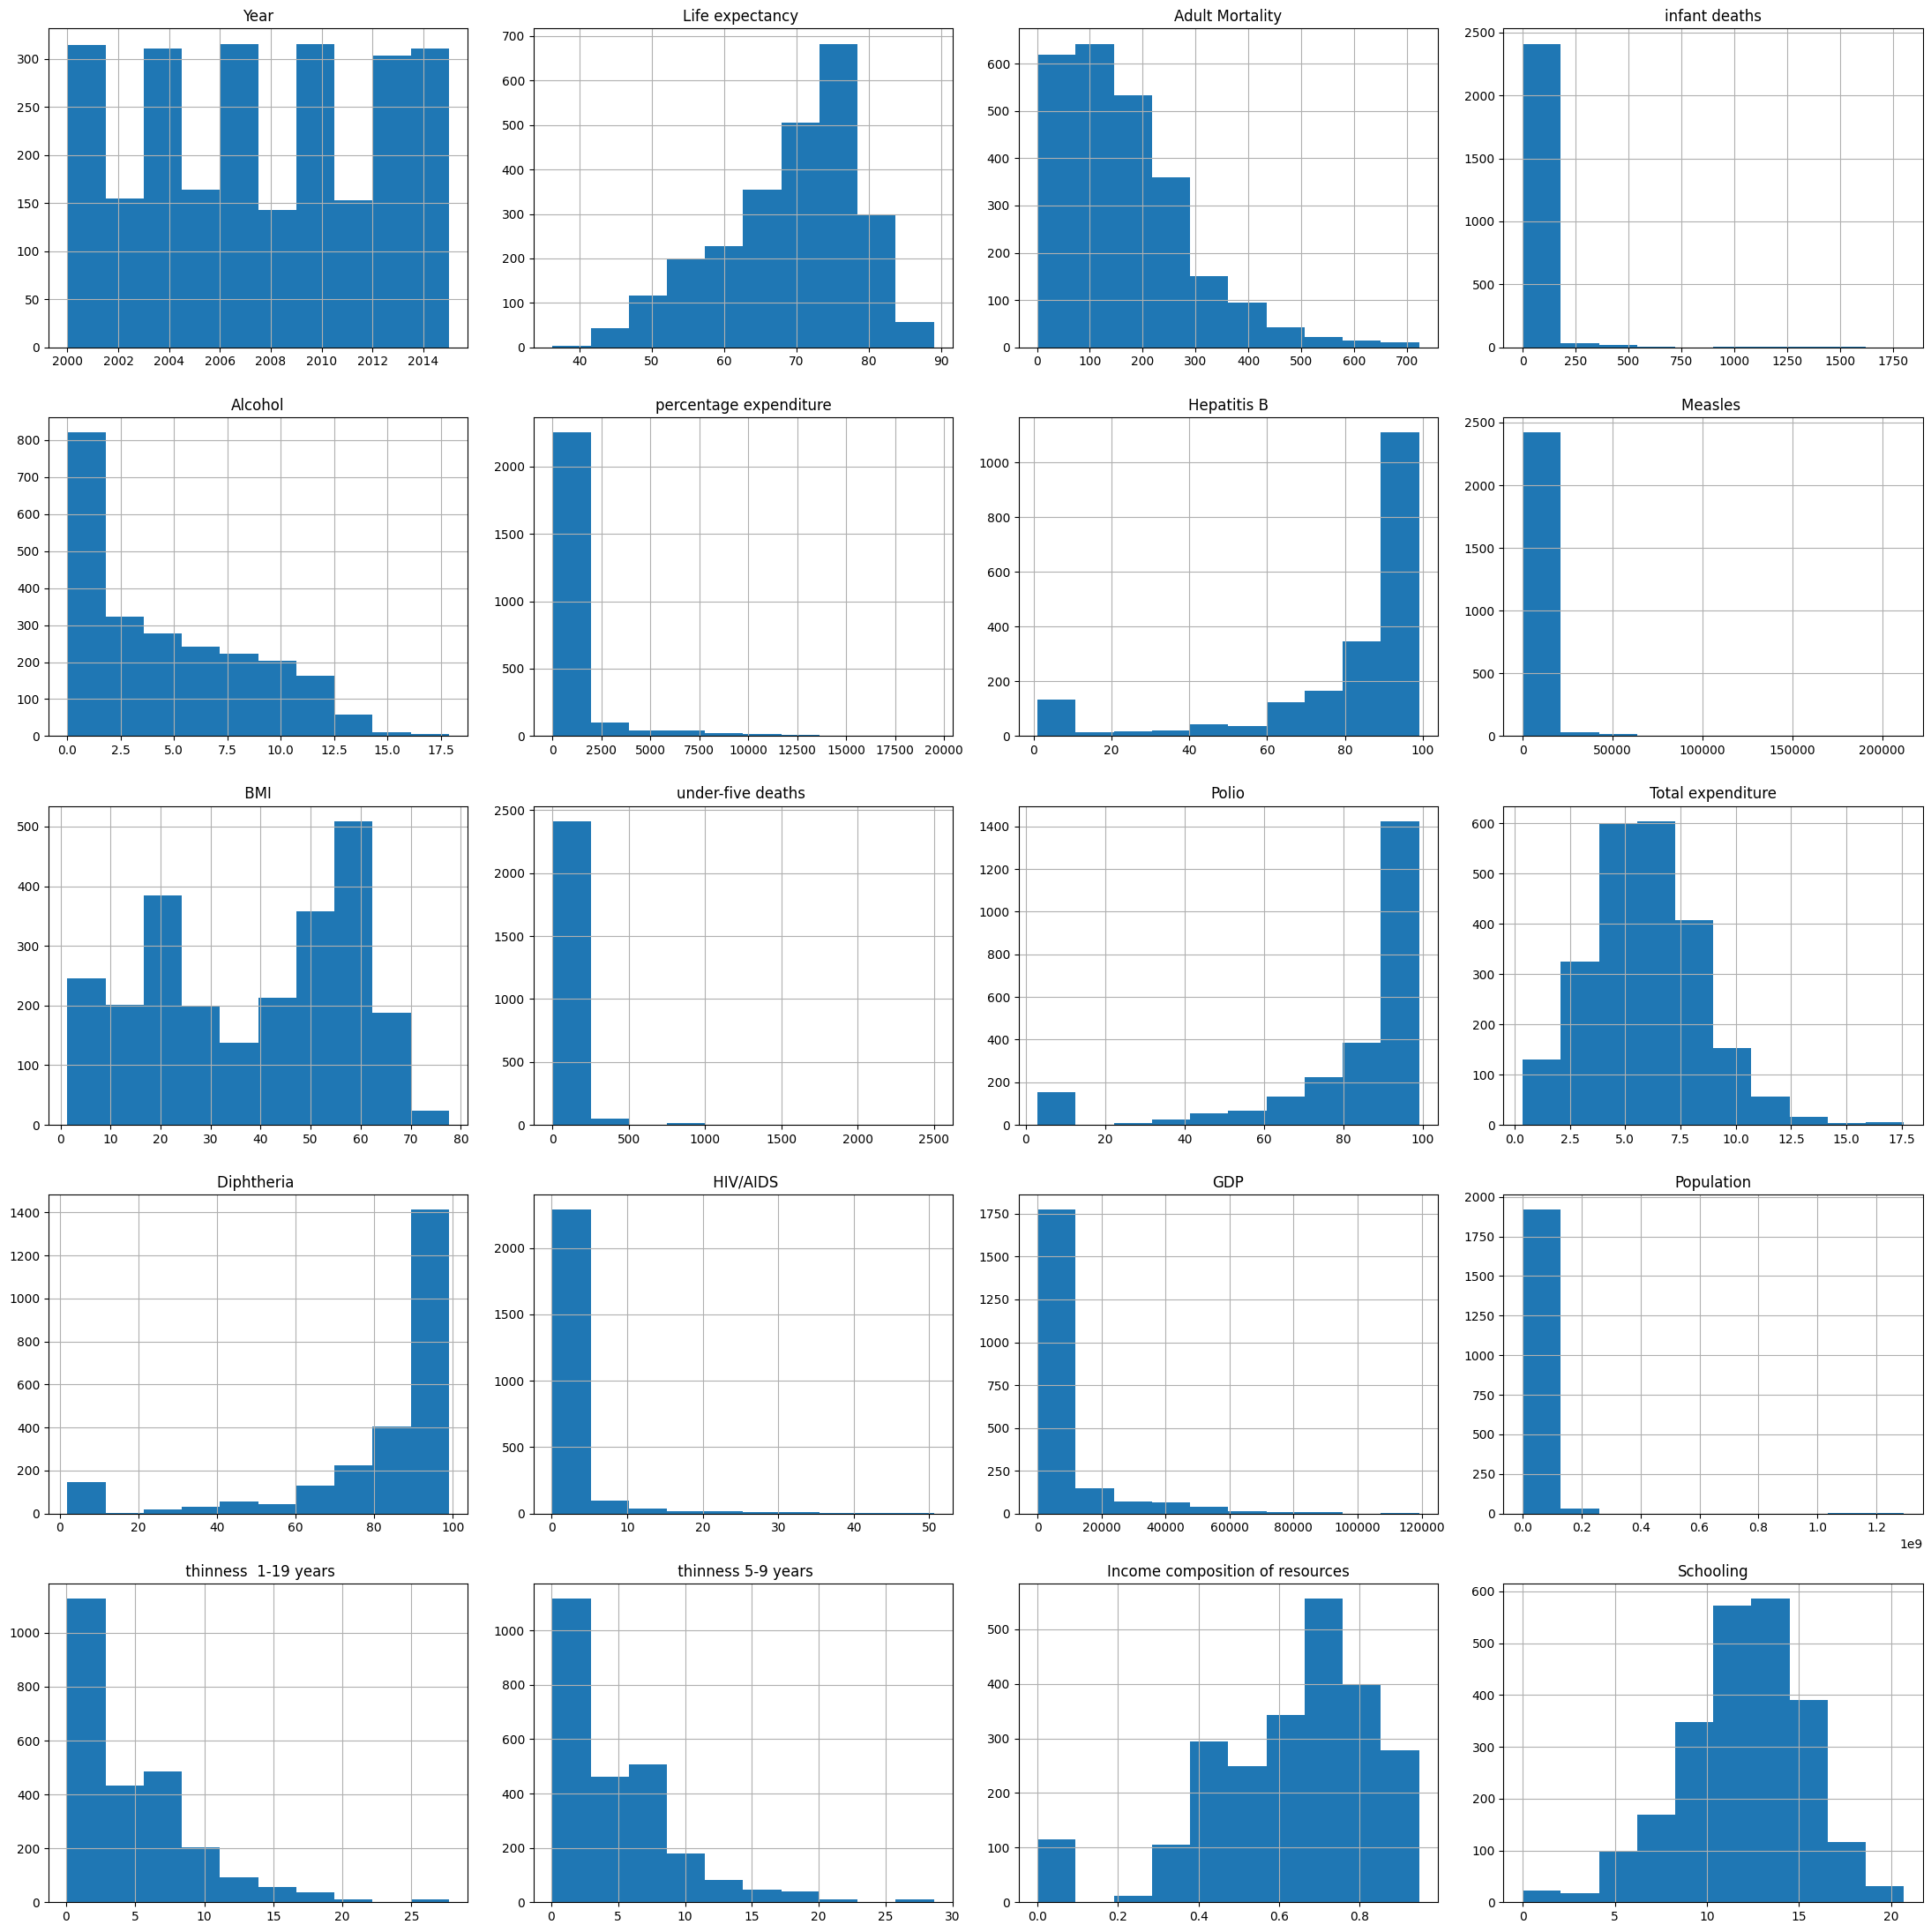

In [326]:
# Histograms
df.hist(figsize=(22, 22))
plt.tight_layout()
plt.show()

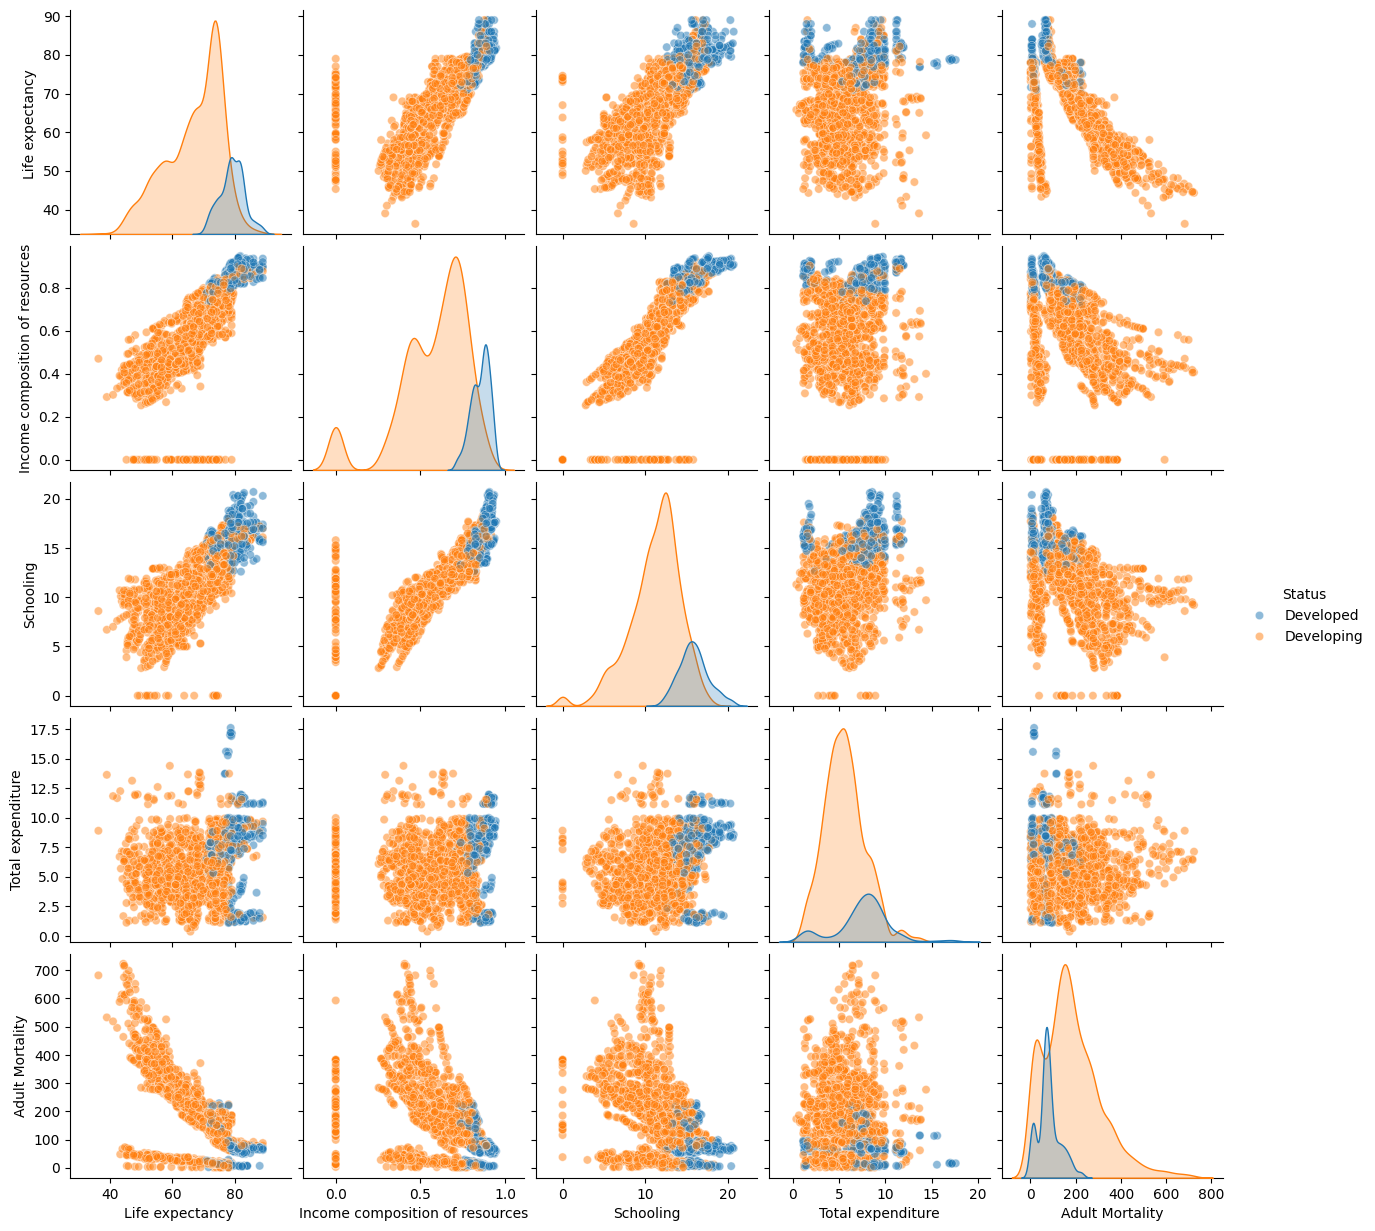

In [327]:
# Pairplot: Life expectancy and selected features
sns.pairplot(df, vars=["Life expectancy ", "Income composition of resources", "Schooling", "Total expenditure", "Adult Mortality"], hue="Status", diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

In [328]:
# Group by Status and check missing percentages
for status in df['Status'].unique():
    subset = df[df['Status'] == status]
    print(f"\n{status} countries:")
    missing_by_status = (subset.isnull().sum() / len(subset) * 100).sort_values(ascending=False)
    print(missing_by_status[missing_by_status > 0].head(23))


    # Check missing data by year (temporal pattern)
print("\nMissing Data by Year (checking temporal patterns):")
print("-"*40)
years_range = df['Year'].unique()
sample_columns = ['GDP', 'Population', 'Hepatitis B']
for col in sample_columns:
    missing_by_year = df.groupby('Year')[col].apply(lambda x: x.isnull().sum())
    if missing_by_year.var() > 10:  # High variance suggests pattern
        print(f"{col}: Missing values vary significantly by year (min: {missing_by_year.min()}, max: {missing_by_year.max()})")
    else:
        print(f"{col}: Missing values consistent across years")



Developed countries:
Hepatitis B                       34.78
Population                        19.91
GDP                               12.81
Schooling                          9.61
Income composition of resources    9.61
Total expenditure                  6.18
Alcohol                            5.26
dtype: float64

Developing countries:
Population                        21.75
Hepatitis B                       16.04
GDP                               14.87
Total expenditure                  8.00
Alcohol                            6.83
Schooling                          4.53
Income composition of resources    4.53
 thinness 5-9 years                1.41
 thinness  1-19 years              1.41
 BMI                               1.41
Diphtheria                         0.78
Polio                              0.78
dtype: float64

Missing Data by Year (checking temporal patterns):
----------------------------------------
GDP: Missing values consistent across years
Population: Missing values c

In [ ]:
life_exp = df['Life expectancy '].dropna()
print(f"\n Life Expectancy Statistics:")
print(f"Mean: {life_exp.mean():.2f}")
print(f"Median: {life_exp.median():.2f}")
print(f"Skewness: {life_exp.skew():.2f}")
print(f"Min: {life_exp.min():.2f}")
print(f"Max: {life_exp.max():.2f}")

# Identify outliers
Q1 = life_exp.quantile(0.25)
Q3 = life_exp.quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Life expectancy '] < Q1 - 1.5*IQR) | (df['Life expectancy '] > Q3 + 1.5*IQR)]
print(f"\n Outliers detected: {len(outliers)} data points")
if len(outliers) > 0:
    print("Countries with outlier life expectancy:")
    print(outliers[['Country', 'Year', 'Life expectancy ']])



📈 Life Expectancy Statistics:
Mean: 69.14
Median: 72.00
Skewness: -0.65
Min: 36.30
Max: 89.00


In [329]:
#developed vs developing 

# Compare key statistics between Developed and Developing
comparison = df.groupby('Status').agg({
    'Life expectancy ': ['mean', 'std', 'min', 'max'],
    'GDP': 'mean',
    'Schooling': 'mean',
    'Income composition of resources': 'mean',
    'Adult Mortality': 'mean'
}).round(2)

print("\n Key Differences by Status:")
print(comparison)



 Key Differences by Status:
           Life expectancy                        GDP Schooling  \
                       mean  std   min   max     mean      mean   
Status                                                            
Developed             79.13 3.89 69.90 89.00 22026.60     15.85   
Developing            67.02 8.99 36.30 89.00  4160.99     11.18   

           Income composition of resources Adult Mortality  
                                      mean            mean  
Status                                                      
Developed                             0.85           79.63  
Developing                            0.58          182.76  


/var/folders/4n/cdd4016n7pn2gt83xq6f1bsh0000gn/T/ipykernel_29398/84891052.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot([df[df['Status']=='Developed']['GDP'].dropna(),
/var/folders/4n/cdd4016n7pn2gt83xq6f1bsh0000gn/T/ipykernel_29398/84891052.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,2].boxplot([df[df['Status']=='Developed']['Schooling'].dropna(),
/var/folders/4n/cdd4016n7pn2gt83xq6f1bsh0000gn/T/ipykernel_29398/84891052.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot([df[df['Status']=='Developed']['Adult Mortality'].dropna(),


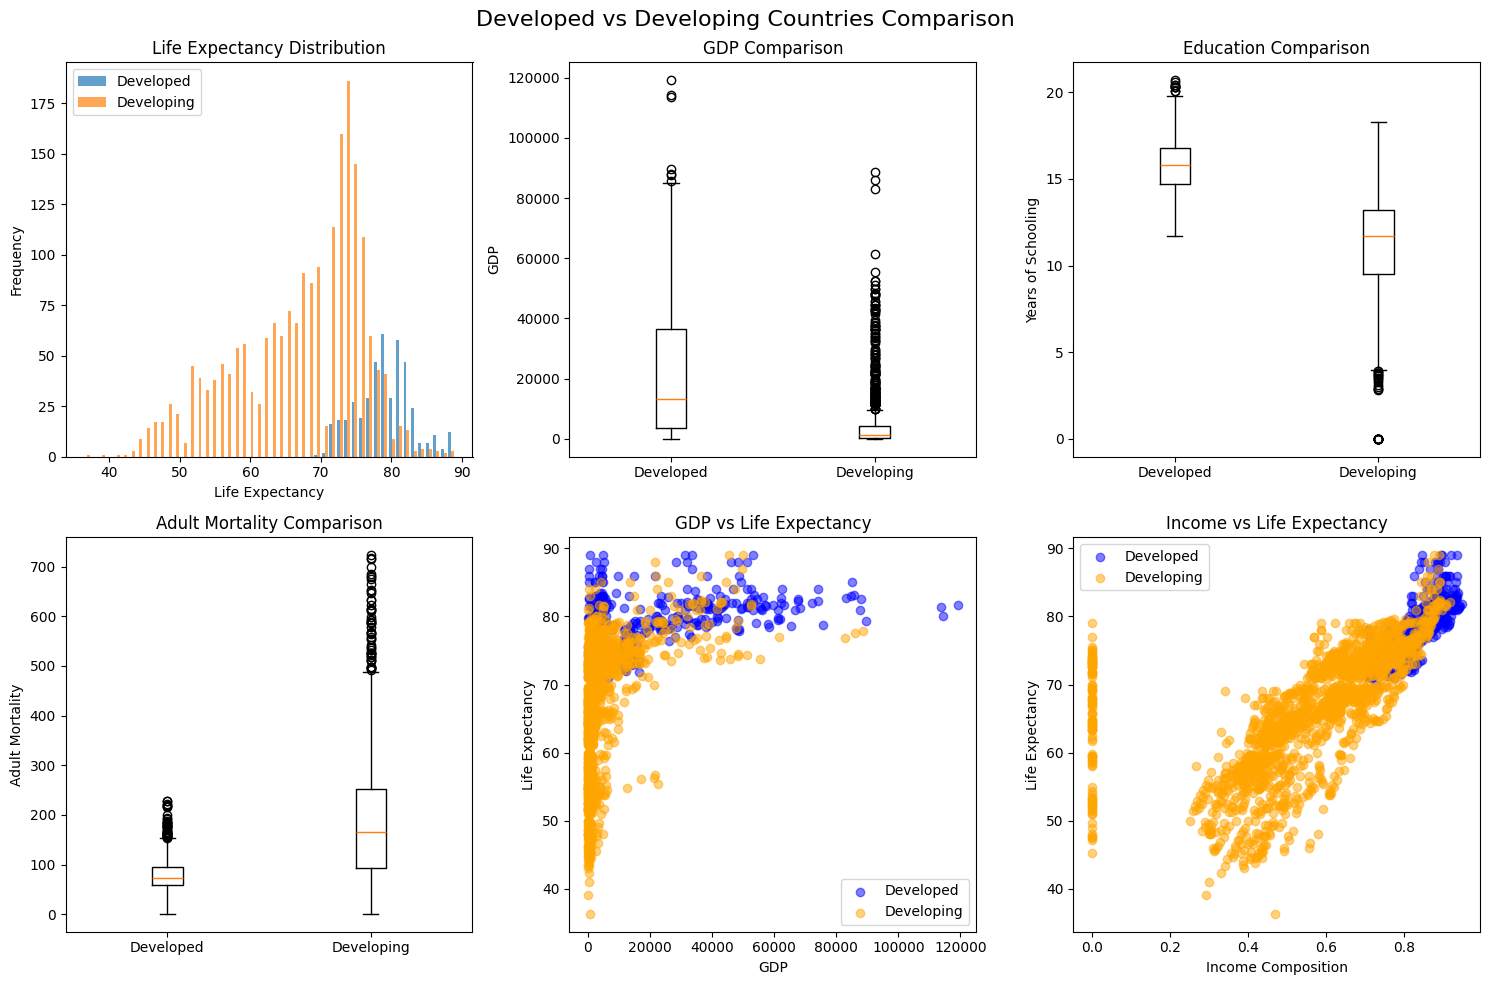

In [330]:
# Visual comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Developed vs Developing Countries Comparison', fontsize=16)

# Life expectancy distribution
axes[0,0].hist([df[df['Status']=='Developed']['Life expectancy '].dropna(),
                df[df['Status']=='Developing']['Life expectancy '].dropna()],
               label=['Developed', 'Developing'], bins=50, alpha=0.7)
axes[0,0].set_xlabel('Life Expectancy')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].set_title('Life Expectancy Distribution')


# GDP comparison
axes[0,1].boxplot([df[df['Status']=='Developed']['GDP'].dropna(),
                   df[df['Status']=='Developing']['GDP'].dropna()],
                  labels=['Developed', 'Developing'])
axes[0,1].set_ylabel('GDP')
axes[0,1].set_title('GDP Comparison')

# Schooling comparison
axes[0,2].boxplot([df[df['Status']=='Developed']['Schooling'].dropna(),
                   df[df['Status']=='Developing']['Schooling'].dropna()],
                  labels=['Developed', 'Developing'])
axes[0,2].set_ylabel('Years of Schooling')
axes[0,2].set_title('Education Comparison')

# Adult Mortality
axes[1,0].boxplot([df[df['Status']=='Developed']['Adult Mortality'].dropna(),
                   df[df['Status']=='Developing']['Adult Mortality'].dropna()],
                  labels=['Developed', 'Developing'])
axes[1,0].set_ylabel('Adult Mortality')
axes[1,0].set_title('Adult Mortality Comparison')

# Scatter plot: GDP vs Life Expectancy
for status, color in [('Developed', 'blue'), ('Developing', 'orange')]:
    subset = df[df['Status'] == status]
    axes[1,1].scatter(subset['GDP'], subset['Life expectancy '], 
                     label=status, alpha=0.5, color=color)
axes[1,1].set_xlabel('GDP')
axes[1,1].set_ylabel('Life Expectancy')
axes[1,1].legend()
axes[1,1].set_title('GDP vs Life Expectancy')

# Income composition vs Life Expectancy
for status, color in [('Developed', 'blue'), ('Developing', 'orange')]:
    subset = df[df['Status'] == status]
    axes[1,2].scatter(subset['Income composition of resources'], 
                     subset['Life expectancy '], 
                     label=status, alpha=0.5, color=color)
axes[1,2].set_xlabel('Income Composition')
axes[1,2].set_ylabel('Life Expectancy')
axes[1,2].legend()
axes[1,2].set_title('Income vs Life Expectancy')

plt.tight_layout()
plt.show()

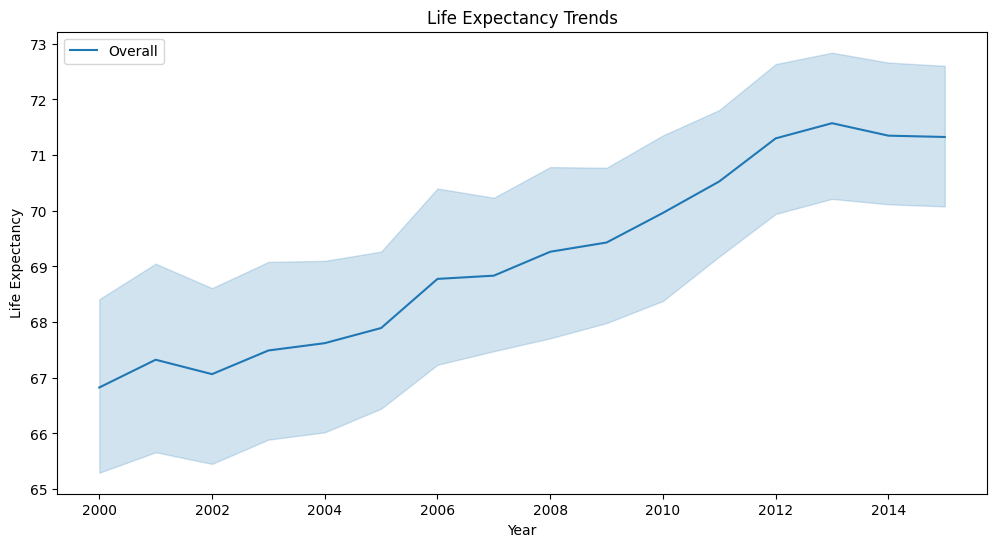

In [331]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy ', label='Overall')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trends')
plt.legend()
plt.show()

In [332]:
#  1. Countries with high GDP but low life expectancy
high_gdp_low_life = df[(df['GDP'] > df['GDP'].quantile(0.75)) & 
                       (df['Life expectancy '] < df['Life expectancy '].quantile(0.25))]
if len(high_gdp_low_life) > 0:
    print("\n1. Countries with HIGH GDP but LOW life expectancy (unexpected!):")
    print(high_gdp_low_life[['Country', 'Year', 'GDP', 'Life expectancy ']])

# 2. Check if alcohol consumption correlates differently by status
dev_alcohol_corr = df[df['Status']=='Developed']['Alcohol'].corr(
    df[df['Status']=='Developed']['Life expectancy '])
developing_alcohol_corr = df[df['Status']=='Developing']['Alcohol'].corr(
    df[df['Status']=='Developing']['Life expectancy '])
print(f"\n2. Alcohol correlation with life expectancy:")
print(f"   Developed countries: {dev_alcohol_corr:.3f}")
print(f"   Developing countries: {developing_alcohol_corr:.3f}")

# 3. Year trends
year_trend = df.groupby('Year')['Life expectancy '].mean()
print(f"\n3. Life expectancy trend over years:")
print(f"   2000: {year_trend.iloc[0]:.1f} years")
print(f"   2015: {year_trend.iloc[-1]:.1f} years")
print(f"   Change: {year_trend.iloc[-1] - year_trend.iloc[0]:.1f} years")



1. Countries with HIGH GDP but LOW life expectancy (unexpected!):
                Country  Year      GDP  Life expectancy 
78                Gabon  2007  8352.82             61.60
198        South Africa  2007  6125.40             54.50
220   Equatorial Guinea  2006 12732.28             54.80
237            Botswana  2011  7645.21             62.20
318        South Africa  2009  5888.63             56.50
402   Equatorial Guinea  2011 21451.89             56.20
430   Equatorial Guinea  2012 21557.65             56.70
677        South Africa  2014  6479.63             62.00
1503  Equatorial Guinea  2010 17136.45             56.10
2134  Equatorial Guinea  2008 22742.38             55.40
2215           Botswana  2010  6346.16             61.10

2. Alcohol correlation with life expectancy:
   Developed countries: -0.309
   Developing countries: 0.200

3. Life expectancy trend over years:
   2000: 66.8 years
   2015: 71.3 years
   Change: 4.5 years


<Axes: xlabel='Life expectancy ', ylabel='Count'>

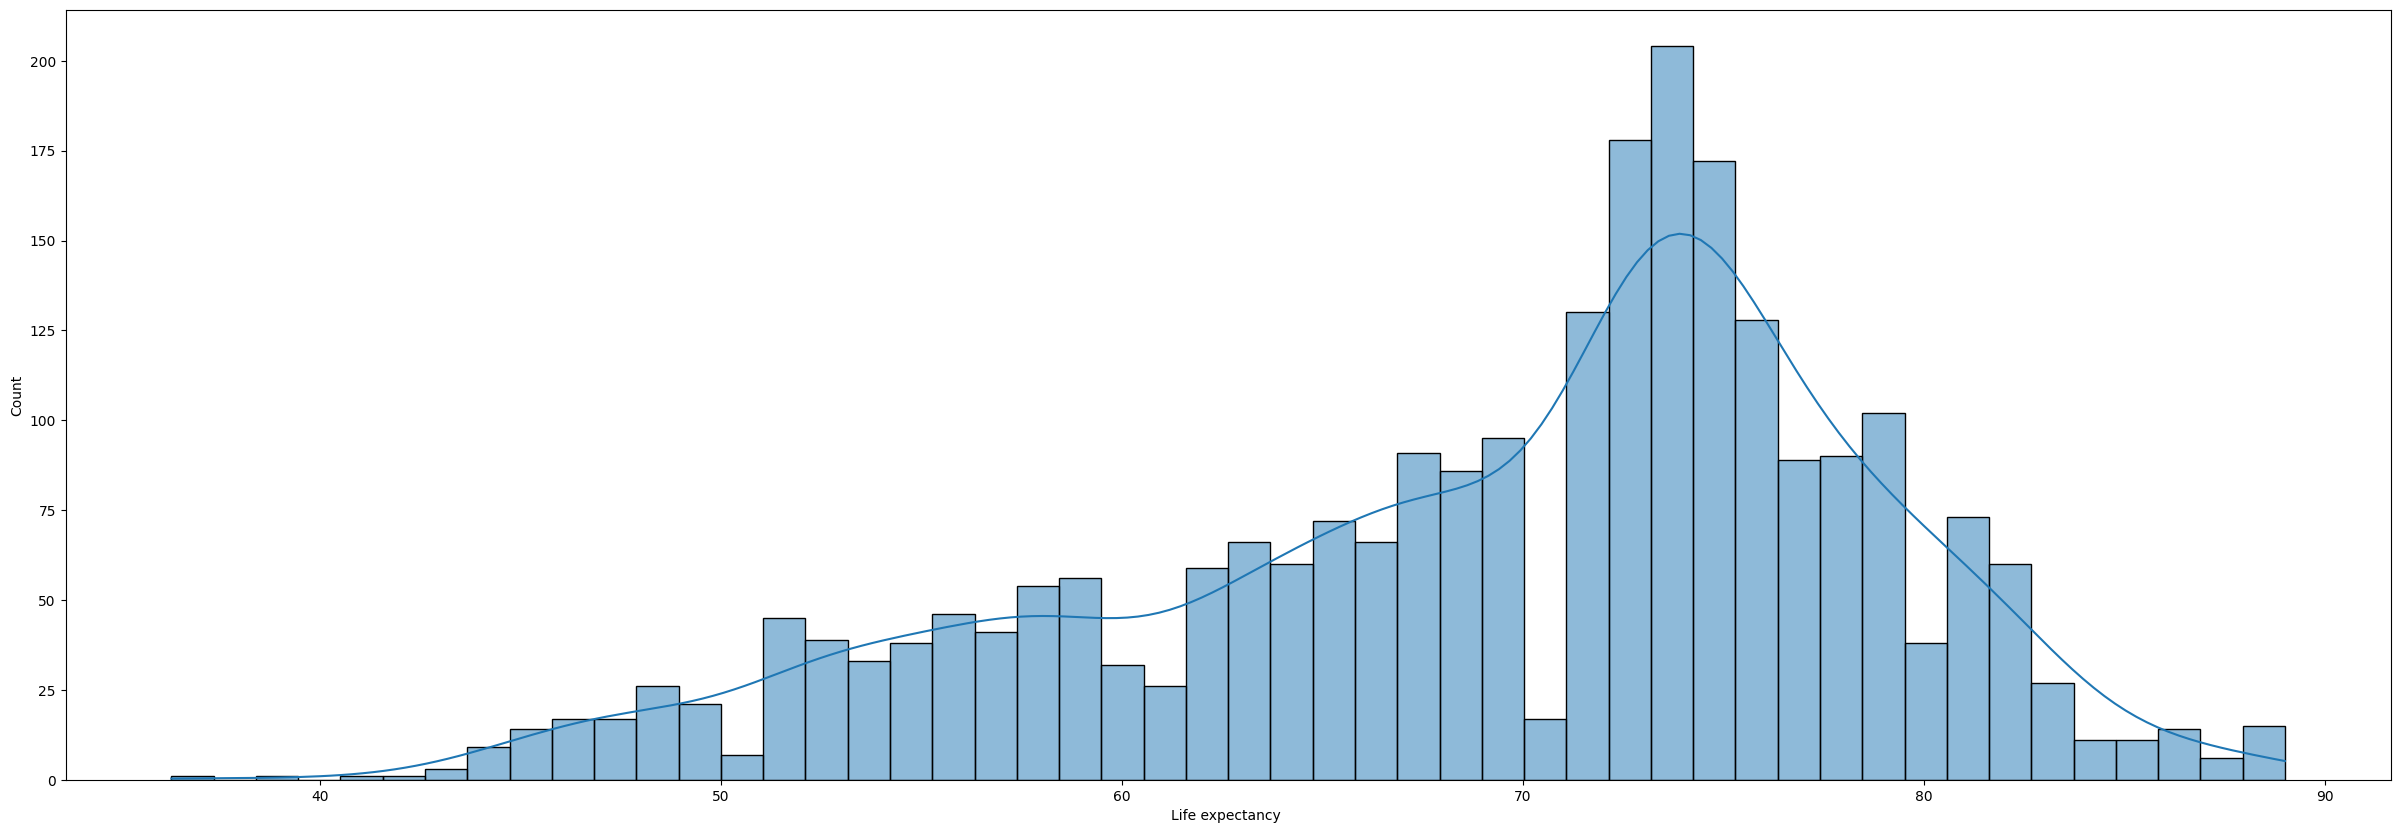

In [334]:
sns.histplot(df["Life expectancy "], bins=50, kde=True)


In [336]:
df.nunique()


Country                             183
Year                                 16
Status                                2
Life expectancy                     358
Adult Mortality                     411
infant deaths                       195
Alcohol                            1003
percentage expenditure             1990
Hepatitis B                          85
Measles                             849
 BMI                                584
under-five deaths                   234
Polio                                73
Total expenditure                   780
Diphtheria                           81
 HIV/AIDS                           181
GDP                                2127
Population                         1949
 thinness  1-19 years               190
 thinness 5-9 years                 200
Income composition of resources     617
Schooling                           172
dtype: int64

In [339]:
df.corr(numeric_only=True)


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.00,0.17,-0.07,-0.03,-0.05,0.04,0.11,-0.08,0.10,-0.03,0.10,0.08,0.14,-0.14,0.11,0.02,-0.03,-0.04,0.25,0.21
Life expectancy,0.17,1.00,-0.69,-0.21,0.40,0.38,0.26,-0.16,0.56,-0.24,0.47,0.22,0.49,-0.56,0.46,-0.02,-0.48,-0.47,0.73,0.76
Adult Mortality,-0.07,-0.69,1.00,0.07,-0.20,-0.24,-0.16,0.03,-0.38,0.09,-0.27,-0.12,-0.27,0.53,-0.29,-0.02,0.30,0.31,-0.45,-0.45
infant deaths,-0.03,-0.21,0.07,1.00,-0.12,-0.09,-0.23,0.50,-0.23,1.00,-0.17,-0.14,-0.18,0.03,-0.11,0.63,0.46,0.47,-0.15,-0.20
Alcohol,-0.05,0.40,-0.20,-0.12,1.00,0.34,0.09,-0.05,0.34,-0.11,0.22,0.31,0.22,-0.05,0.35,-0.04,-0.43,-0.42,0.45,0.55
percentage expenditure,0.04,0.38,-0.24,-0.09,0.34,1.00,0.01,-0.06,0.23,-0.09,0.15,0.20,0.14,-0.10,0.90,-0.02,-0.25,-0.25,0.38,0.40
Hepatitis B,0.11,0.26,-0.16,-0.23,0.09,0.01,1.00,-0.12,0.16,-0.24,0.48,0.07,0.59,-0.11,0.08,-0.13,-0.14,-0.14,0.20,0.22
Measles,-0.08,-0.16,0.03,0.50,-0.05,-0.06,-0.12,1.00,-0.17,0.51,-0.13,-0.11,-0.14,0.04,-0.07,0.28,0.22,0.21,-0.13,-0.13
BMI,0.10,0.56,-0.38,-0.23,0.34,0.23,0.16,-0.17,1.00,-0.24,0.29,0.24,0.29,-0.25,0.29,-0.08,-0.52,-0.53,0.50,0.55
under-five deaths,-0.03,-0.24,0.09,1.00,-0.11,-0.09,-0.24,0.51,-0.24,1.00,-0.19,-0.14,-0.20,0.05,-0.11,0.61,0.46,0.47,-0.17,-0.21


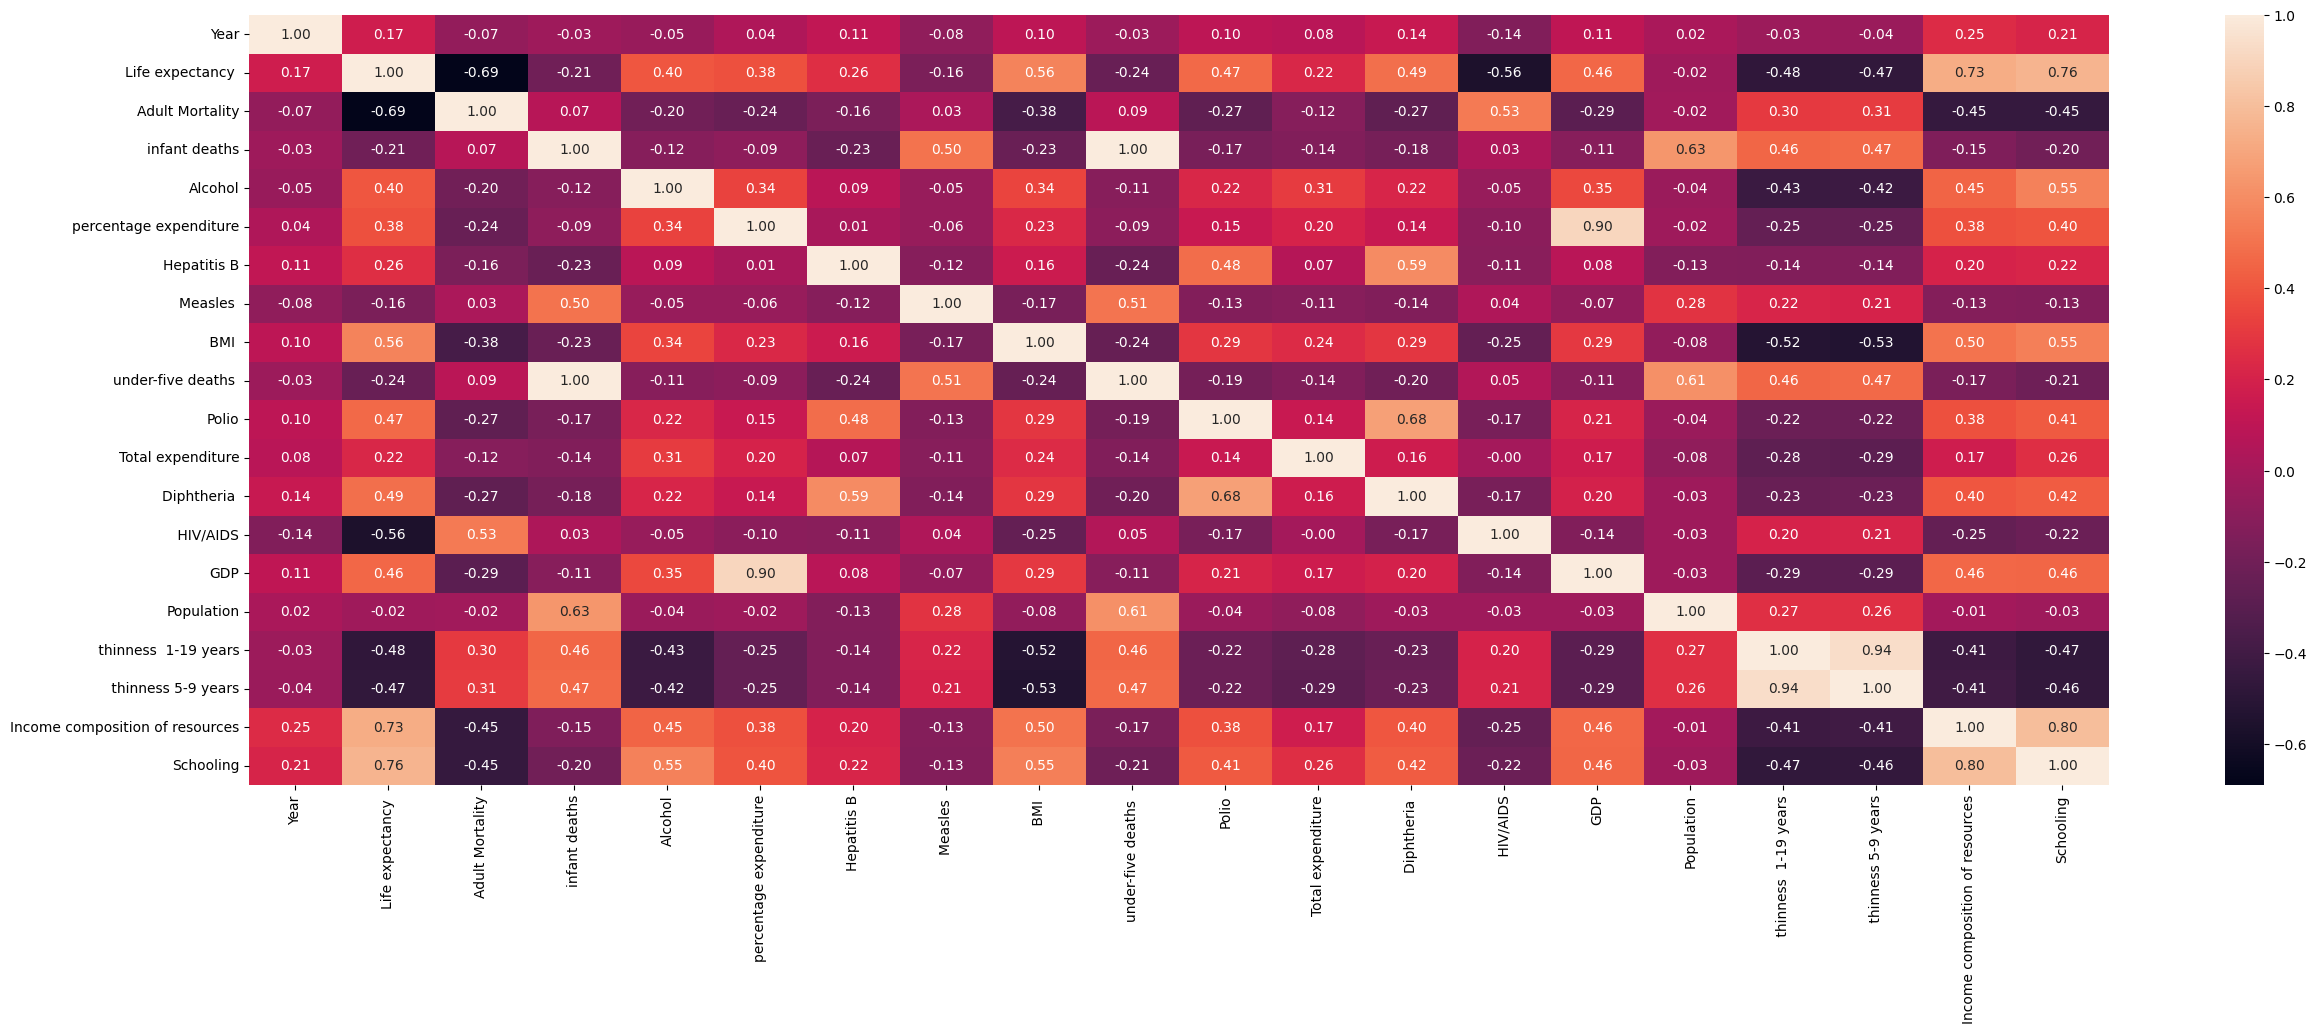

In [340]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

plt.rcParams['figure.figsize'] = (30, 10)
plt.show()

In [341]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix["Life expectancy "].sort_values(ascending=False))


Life expectancy                    1.00
Schooling                          0.76
Income composition of resources    0.73
 BMI                               0.56
Diphtheria                         0.49
Polio                              0.47
GDP                                0.46
Alcohol                            0.40
percentage expenditure             0.38
Hepatitis B                        0.26
Total expenditure                  0.22
Year                               0.17
Population                        -0.02
Measles                           -0.16
infant deaths                     -0.21
under-five deaths                 -0.24
 thinness 5-9 years               -0.47
 thinness  1-19 years             -0.48
 HIV/AIDS                         -0.56
Adult Mortality                   -0.69
Name: Life expectancy , dtype: float64


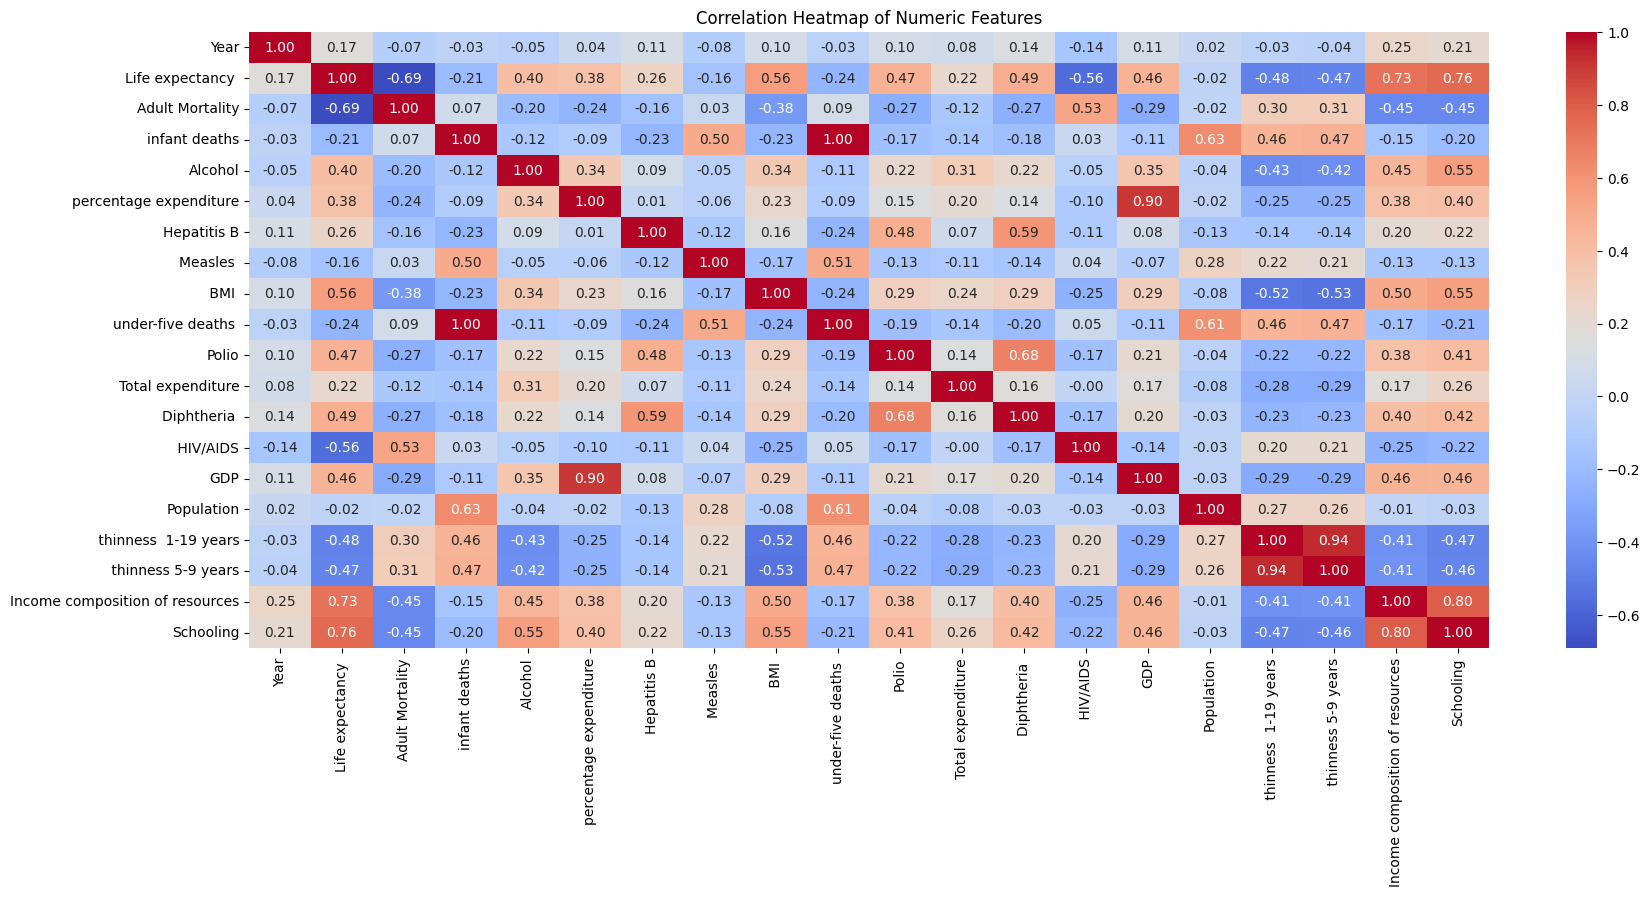

In [342]:


corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


/var/folders/4n/cdd4016n7pn2gt83xq6f1bsh0000gn/T/ipykernel_29398/3662469900.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette="coolwarm")


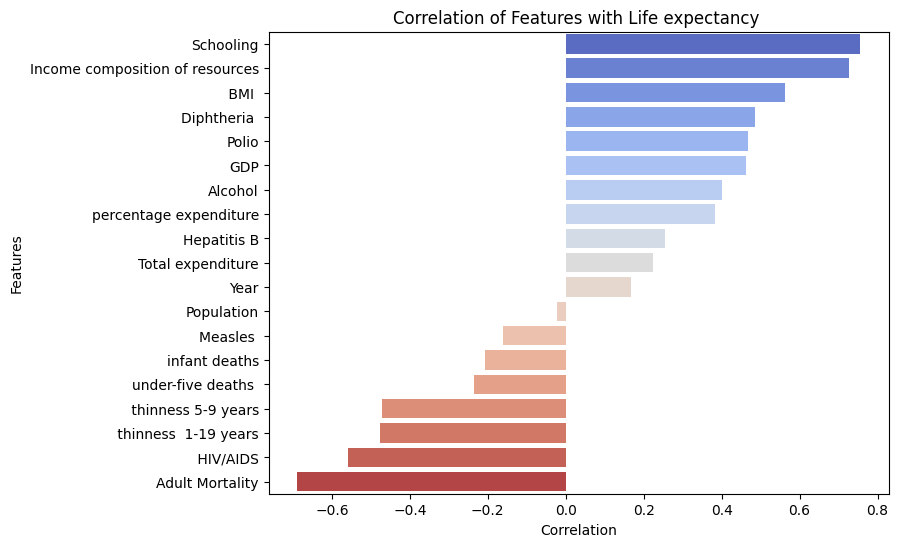

In [343]:
target = "Life expectancy "

# Compute correlations with the target only
corr_with_target = df.select_dtypes(include=['number']).corr()[target].drop(target)

# Sort values
corr_sorted = corr_with_target.sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette="coolwarm")
plt.title(f"Correlation of Features with {target}")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()


In [344]:
df.groupby('Country').mean(numeric_only=True).sort_values(by='Life expectancy ', ascending=False)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Austria,2008.80,82.56,70.40,0.00,12.20,5243.92,82.30,119.20,50.06,0.00,86.20,5.86,87.20,0.10,36832.13,6869917.10,1.74,1.95,0.87,15.41
Sweden,2007.54,82.54,58.23,0.00,6.96,5108.73,57.25,19.92,56.25,0.00,98.31,10.01,98.31,0.10,33062.88,5275705.92,1.35,1.30,0.89,15.85
Japan,2006.93,82.49,56.57,2.93,6.99,3796.32,NaN,7810.79,25.32,4.07,95.79,7.25,96.14,0.10,24660.66,93048.79,1.80,1.53,0.88,14.94
Switzerland,2007.57,82.44,58.57,0.00,10.37,9432.77,NaN,381.57,51.06,0.00,95.43,6.03,94.57,0.10,56666.86,5673637.36,0.54,0.39,0.91,15.41
Italy,2007.15,82.37,56.31,2.00,8.35,2571.05,95.54,1540.62,55.18,2.31,96.15,8.74,94.54,0.10,18547.94,28970228.38,0.51,0.52,0.86,15.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lesotho,2007.73,49.05,542.33,4.47,2.11,83.07,78.83,282.40,25.13,6.27,66.53,7.65,84.13,22.19,795.39,1151647.53,7.02,6.89,0.46,10.65
Malawi,2006.79,49.04,426.64,38.21,0.97,24.31,88.83,8637.29,16.52,60.71,88.64,5.91,82.14,17.90,209.52,6414839.50,7.19,7.06,0.40,10.17
Angola,2007.47,49.04,325.73,83.73,5.65,92.25,70.38,3781.07,17.93,132.60,44.87,3.92,46.27,2.35,1848.91,10678509.67,5.97,6.49,0.46,8.04


<Axes: xlabel='Status'>

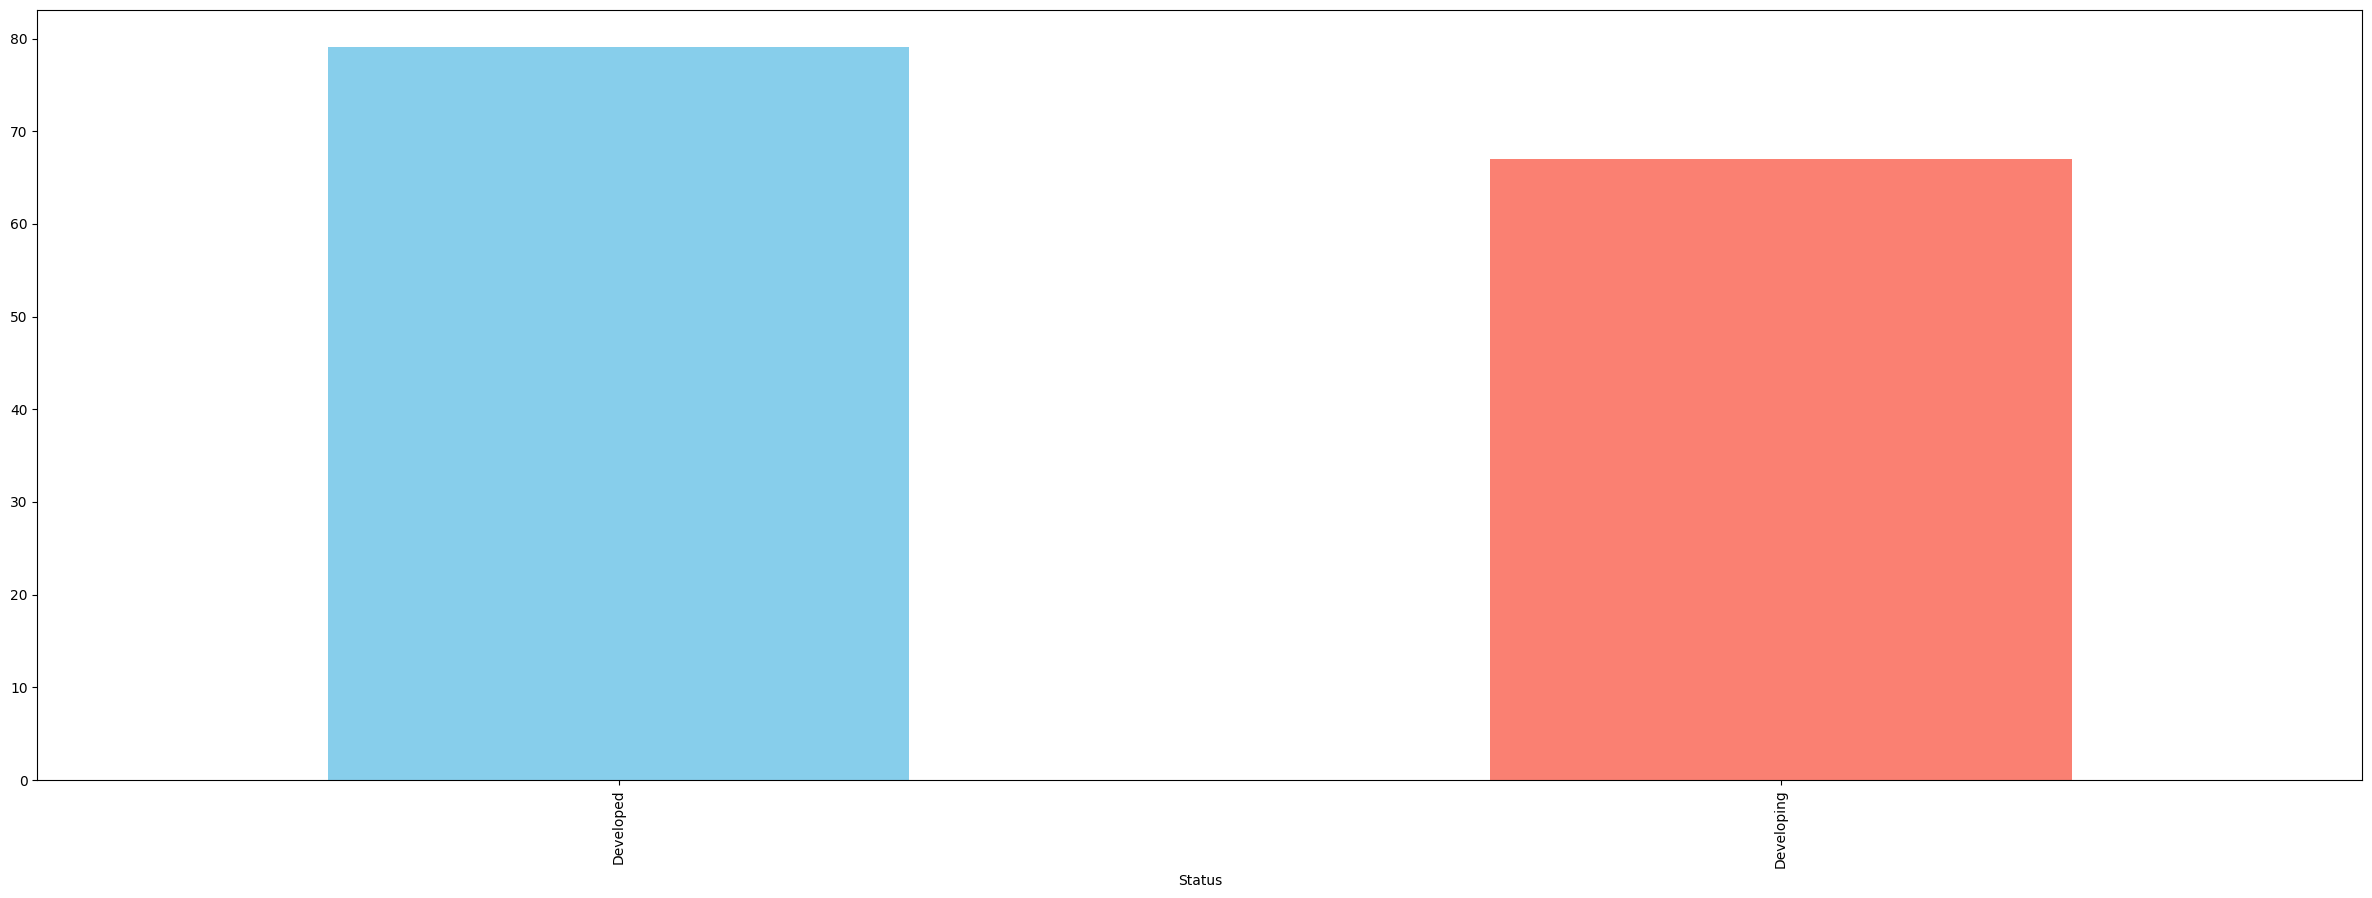

In [345]:
df.groupby('Status')['Life expectancy '].mean().sort_values(ascending=False).plot(kind='bar', color=['skyblue', 'salmon'])

<Axes: xlabel='Country'>

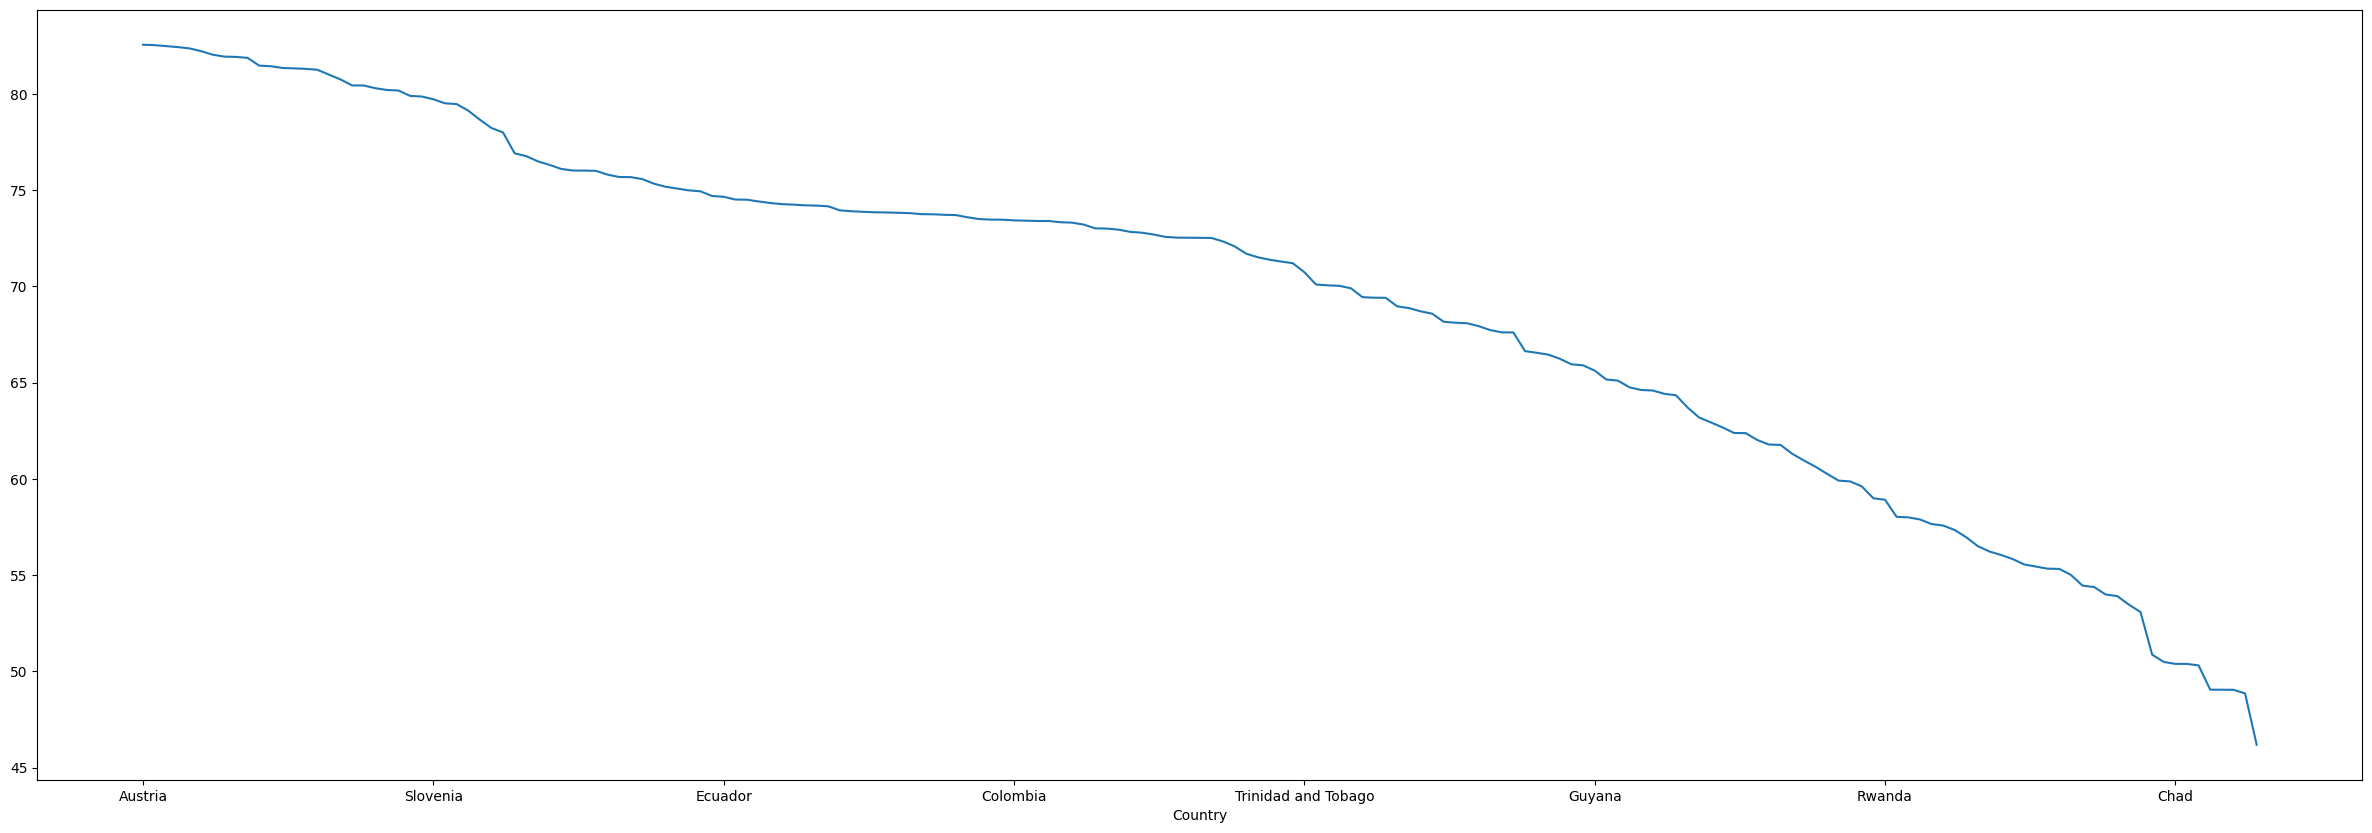

In [346]:
df2 =df.groupby('Country').mean(numeric_only=True).sort_values(by='Life expectancy ', ascending=False)['Life expectancy ']
# df2.transpose()
df2.plot()

<Axes: title={'center': 'Life expectancy '}, xlabel='Status'>

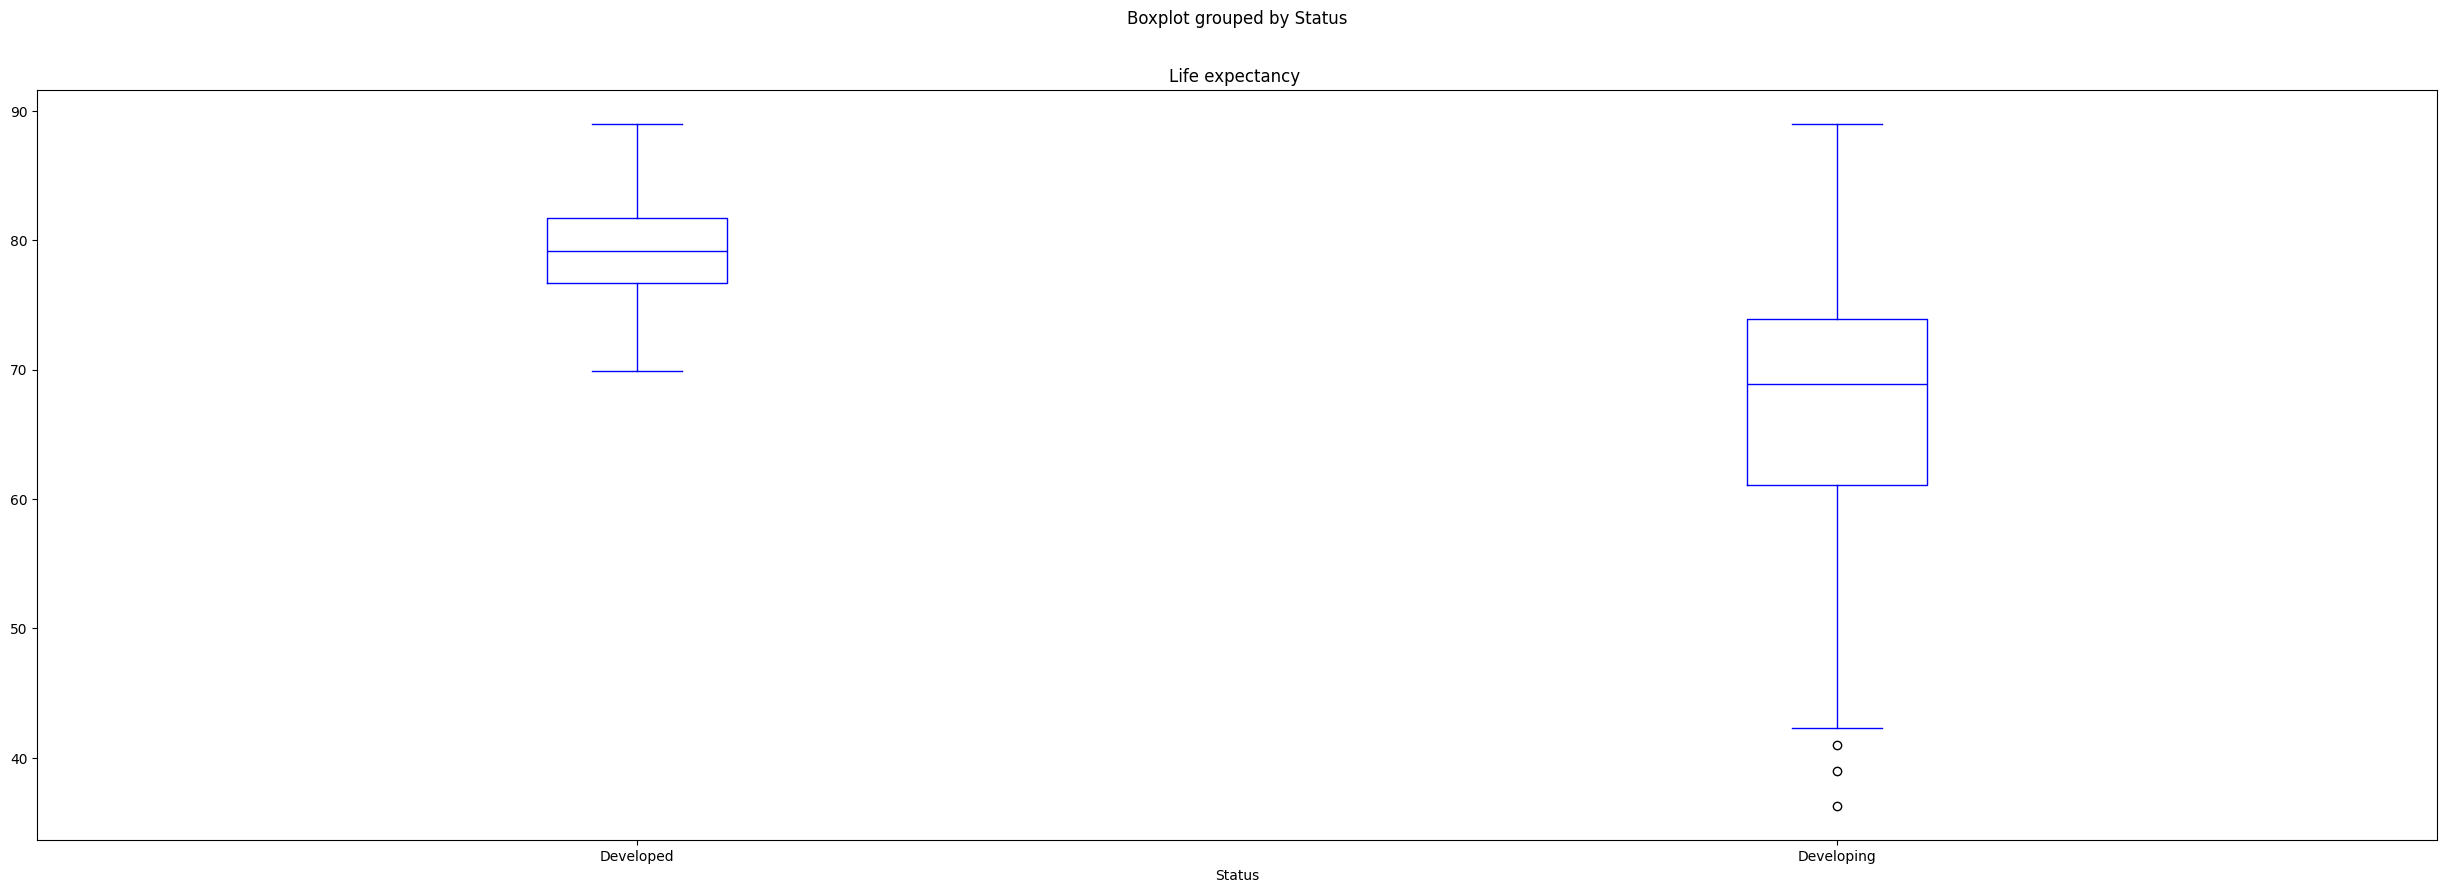

In [347]:
df.boxplot(
    column=["Life expectancy "],   # notice the trailing space if your column has one!
    by="Status",
    grid=False,
    color="blue"
)


/var/folders/4n/cdd4016n7pn2gt83xq6f1bsh0000gn/T/ipykernel_29398/1697846034.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y="Life expectancy ", data=df, palette="Set2")


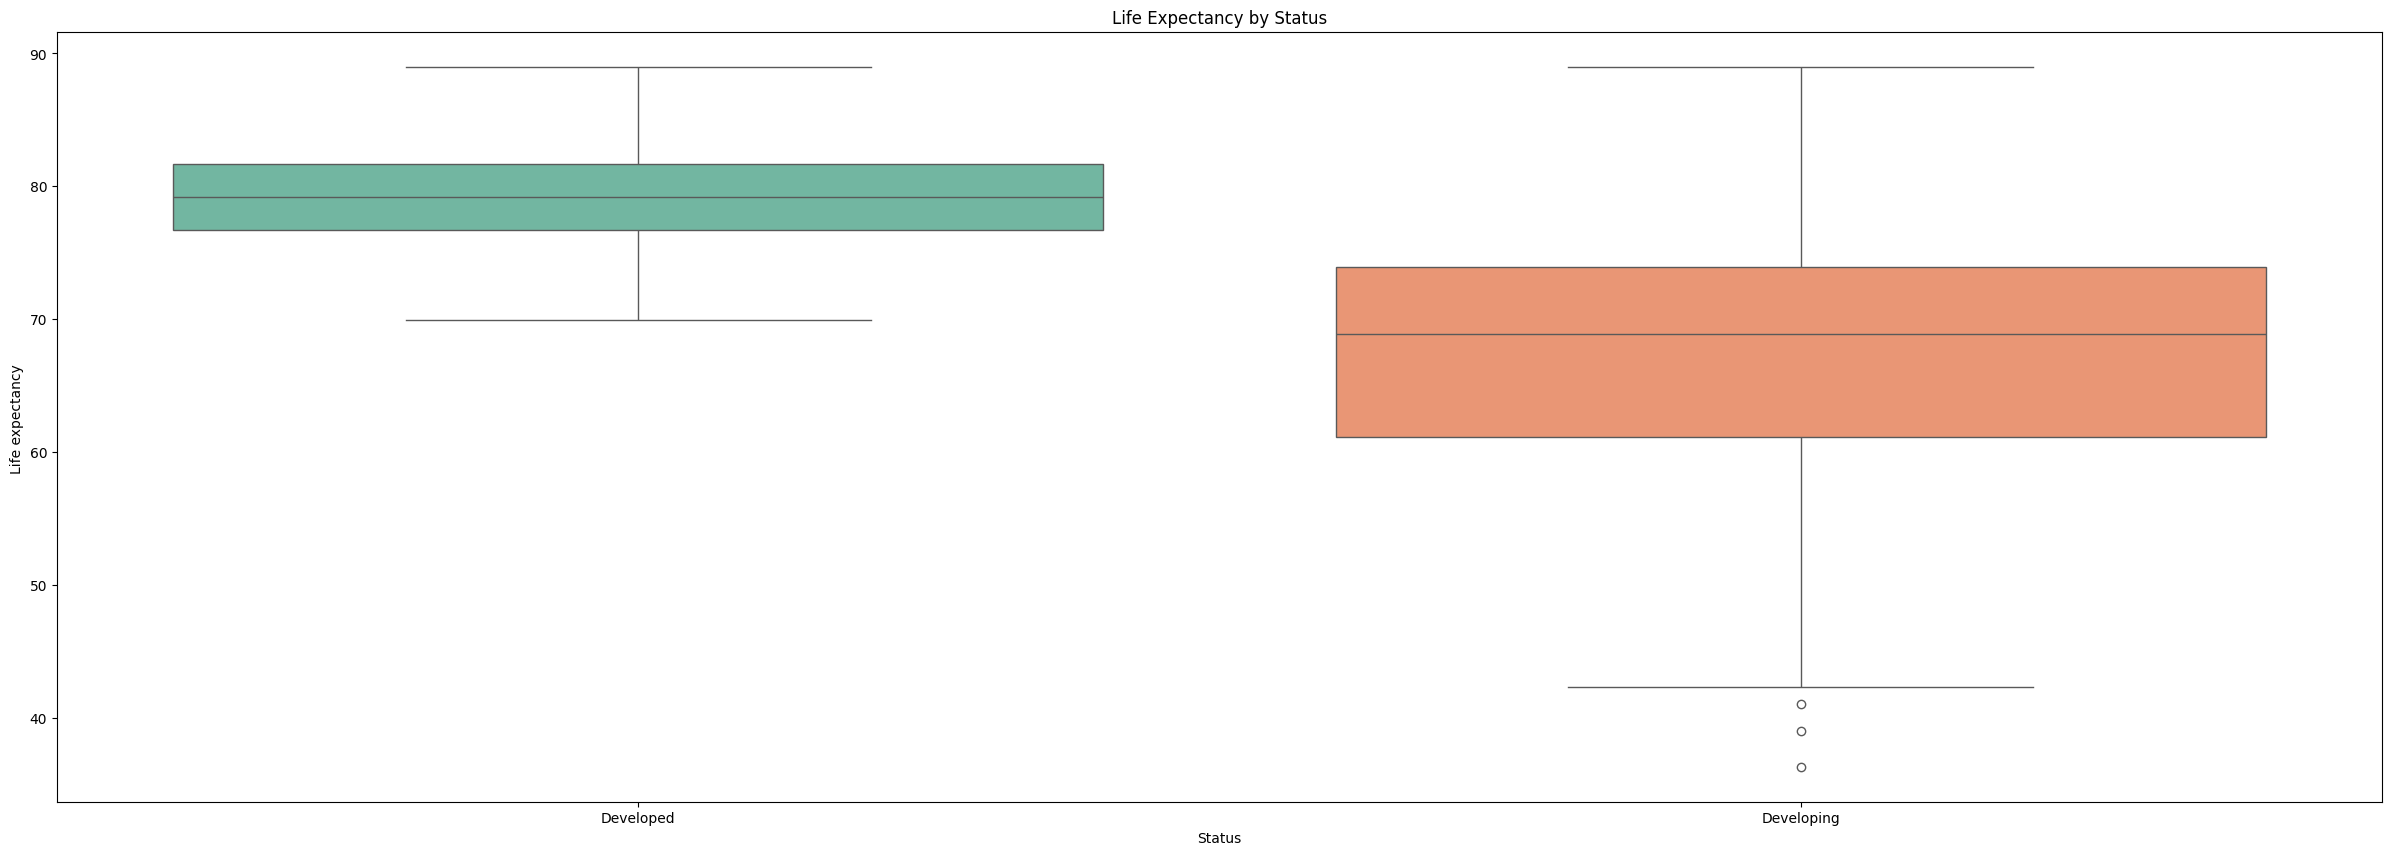

In [348]:
sns.boxplot(x="Status", y="Life expectancy ", data=df, palette="Set2")
plt.title("Life Expectancy by Status")
plt.show()


In [349]:
df.dtypes


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object